## Sai Gautam Gunda

##  Defining the Problem
     The problem statement deals with the Amazon company reviews with individual sentiments.
     We now classify the data and tell whether a particular review is positive speech or negative or neutral.

## Table of Contents
    About the Dataset
    Text Cleaning
    Feature Engineering
    Train an ML model for Text Classification
    Evaluate the ML model
    Conclusion

## About the Dataset
The dataset that you are going to use is of Detecting Positive Speech and Negative and Neutral in Amazon's Public reviews. Let's load the dataset using pandas and have a quick look at some sample reviews.

In [1]:
import re
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data from file directory

In [2]:
import os 
# define working directory
# os module provides access to system features
os.chdir("D:/nlpworkshop")
dataset=pd.read_csv("Amazon_Sentiment_Text.csv",encoding="latin-1")

In [3]:
dataset.head()

,sentiment,Text
0,1,I have bought several of the Vitality canned d...
1,0,Product arrived labeled as Jumbo Salted Peanut...
2,0,This is a confection that has been around a fe...
3,0,If you are looking for the secret ingredient i...
4,1,Great taffy at a great price. There was a wid...


## Data Preprocessing

## Data Cleaning

In [4]:
def clean_text(text): 
    #remove unwanted white spaces 
    text=re.sub(r'\s+',' ',text) 
    #remove any characters which are not alphabets 
    text=re.sub(r'[^a-zA-Z#]+',' ',text) 
    #remove any html tags 
    text=re.sub(r'<.*?>','',text) 
    #converting to lower 
    text=text.lower() 
    return text

In [5]:
dataset['Text'] = dataset['Text'].apply(lambda x: clean_text(x))

## Tokenization
This is process of breaking down a sentence into a word list called Tokens.

In [6]:
# tokenized reviews
import nltk
#nltk.download('punkt')
#this is process of breaking down a sentence into a word list called tokens
from nltk.tokenize import word_tokenize
tk_rev = dataset['Text'].apply(lambda x: x.split())
tk_rev.head(10)

0    [i, have, bought, several, of, the, vitality, ...
1    [product, arrived, labeled, as, jumbo, salted,...
2    [this, is, a, confection, that, has, been, aro...
3    [if, you, are, looking, for, the, secret, ingr...
4    [great, taffy, at, a, great, price, there, was...
5    [i, got, a, wild, hair, for, taffy, and, order...
6    [this, saltwater, taffy, had, great, flavors, ...
7    [this, taffy, is, so, good, it, is, very, soft...
8    [right, now, i, m, mostly, just, sprouting, th...
9    [this, is, a, very, healthy, dog, food, good, ...
Name: Text, dtype: object

In [7]:
#stop words removal
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
tk_rev.apply(lambda tokens: [word for word in tokens if word not in stop_words])
print(tk_rev)

0       [i, have, bought, several, of, the, vitality, ...
1       [product, arrived, labeled, as, jumbo, salted,...
2       [this, is, a, confection, that, has, been, aro...
3       [if, you, are, looking, for, the, secret, ingr...
4       [great, taffy, at, a, great, price, there, was...
                              ...                        
1994    [this, is, a, delicious, recipe, and, ingredie...
1995    [i, have, to, laugh, at, the, reviews, that, s...
1996    [i, had, read, some, favorable, reviews, of, t...
1997    [i, was, expecting, great, things, based, on, ...
1998    [i, love, this, pancake, mix, i, bought, my, f...
Name: Text, Length: 1999, dtype: object


## Stemming or Lemmatization
it a NLP technique that is used to reduce words to their base form/root form.

In [8]:
# Stemming
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()
tk_rev = tk_rev.apply(lambda x:[stemmer.stem(i) for i in x])
tk_rev.head()

0    [i, have, bought, sever, of, the, vital, can, ...
1    [product, arriv, label, as, jumbo, salt, peanu...
2    [thi, is, a, confect, that, ha, been, around, ...
3    [if, you, are, look, for, the, secret, ingredi...
4    [great, taffi, at, a, great, price, there, wa,...
Name: Text, dtype: object

## Removing short words

In [9]:
#Removing short words
dataset['Text'] = dataset['Text'].apply(lambda x: ' '.join(word for word in x.split() if len(word)>3))
dataset.head(10)

,sentiment,Text
0,1,have bought several vitality canned food produ...
1,0,product arrived labeled jumbo salted peanuts p...
2,0,this confection that been around centuries lig...
3,0,looking secret ingredient robitussin believe h...
4,1,great taffy great price there wide assortment ...
5,0,wild hair taffy ordered this five pound taffy ...
6,1,this saltwater taffy great flavors very soft c...
7,1,this taffy good very soft chewy flavors amazin...
8,1,right mostly just sprouting this cats grass th...
9,1,this very healthy food good their digestion al...


## Exploratory data analysis EDA

Clean and preprocess the data
Explore the dataset to gain insights into the file size, shape, sample

In [10]:
dataset.size

3998

In [11]:
dataset.shape

(1999, 2)

In [12]:
dataset.sample()

,sentiment,Text
1042,1,just baby back ribs strips jerky smoker this s...


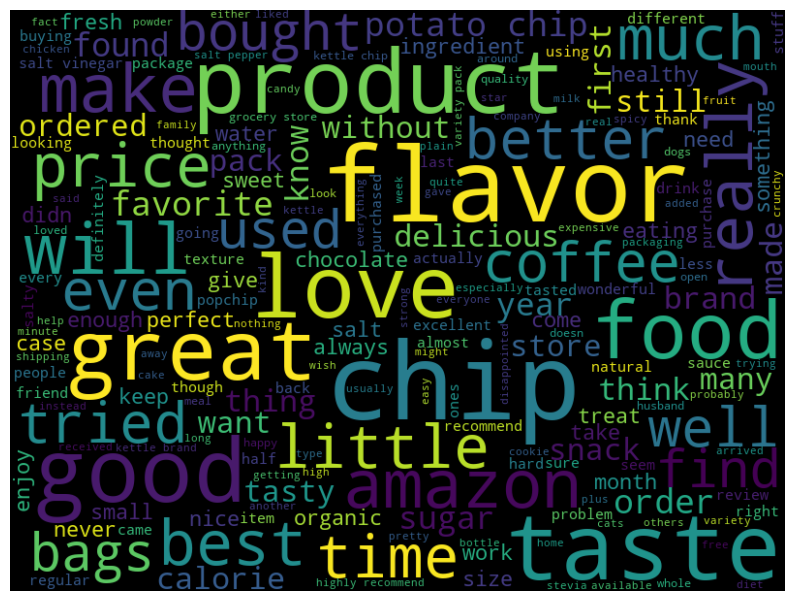

In [13]:
# Visualization
#!pip install wordcloud
from wordcloud import WordCloud
all_words =' '.join([i for i in dataset['Text']])
wc = WordCloud(width=800,height=600,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

## Feature Engineering
It means the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful. The machine learning model does not understand text directly, so we create numerical features that reperesant the underlying text.

In [14]:
from textblob import TextBlob

# Function to get sentiment scores using TextBlob
def get_sentiment_scores(Text):
    analysis = TextBlob(Text)    
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply sentiment analysis and create new columns for sentiment scores
dataset['Polarity'], dataset['Subjectivity'] = zip(*dataset['Text'].apply(get_sentiment_scores))

# Display the DataFrame with sentiment scores
print(dataset['Text'],dataset['Polarity'],dataset['Subjectivity'])

0       have bought several vitality canned food produ...
1       product arrived labeled jumbo salted peanuts p...
2       this confection that been around centuries lig...
3       looking secret ingredient robitussin believe h...
4       great taffy great price there wide assortment ...
                              ...                        
1994    this delicious recipe ingredients pricy mind p...
1995    have laugh reviews that said much work have li...
1996    read some favorable reviews this pancake amazo...
1997    expecting great things based reviews while goo...
1998    love this pancake bought first from whole food...
Name: Text, Length: 1999, dtype: object 0       0.450000
1       0.216667
2       0.189167
3       0.166667
4       0.483333
          ...   
1994    1.000000
1995    0.221875
1996    0.265147
1997    0.672667
1998    0.091667
Name: Polarity, Length: 1999, dtype: float64 0       0.433333
1       0.762963
2       0.506667
3       0.533333
4       0.637500
     

## Top 20 Common words in reviews

In [15]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return tokens

dataset['Tokens'] = dataset['Text'].apply(preprocess_text)

In [16]:
from collections import Counter
word_freq = Counter([word for tokens in dataset['Tokens'] for word in tokens])

In [17]:
print(word_freq)

Counter({'chips': 1035, 'like': 822, 'good': 711, 'great': 637, 'flavor': 568, 'taste': 560, 'product': 519, 'love': 485, 'food': 393, 'amazon': 365, 'would': 348, 'really': 341, 'much': 316, 'best': 296, 'also': 292, 'flavors': 289, 'time': 280, 'salt': 275, 'price': 265, 'find': 252, 'better': 246, 'tried': 245, 'potato': 244, 'bags': 240, 'little': 239, 'make': 228, 'even': 223, 'coffee': 214, 'well': 213, 'sugar': 211, 'kettle': 204, 'first': 187, 'pack': 185, 'order': 185, 'bought': 181, 'favorite': 181, 'used': 177, 'found': 174, 'brand': 170, 'recommend': 166, 'many': 159, 'delicious': 158, 'chip': 157, 'store': 155, 'know': 154, 'could': 151, 'made': 150, 'since': 148, 'organic': 146, 'think': 146, 'sweet': 143, 'without': 142, 'ordered': 140, 'still': 137, 'free': 137, 'snack': 137, 'vinegar': 137, 'regular': 136, 'tasty': 133, 'ever': 132, 'eating': 128, 'healthy': 127, 'fresh': 127, 'want': 126, 'quality': 125, 'enough': 125, 'never': 123, 'perfect': 123, 'size': 123, 'choco

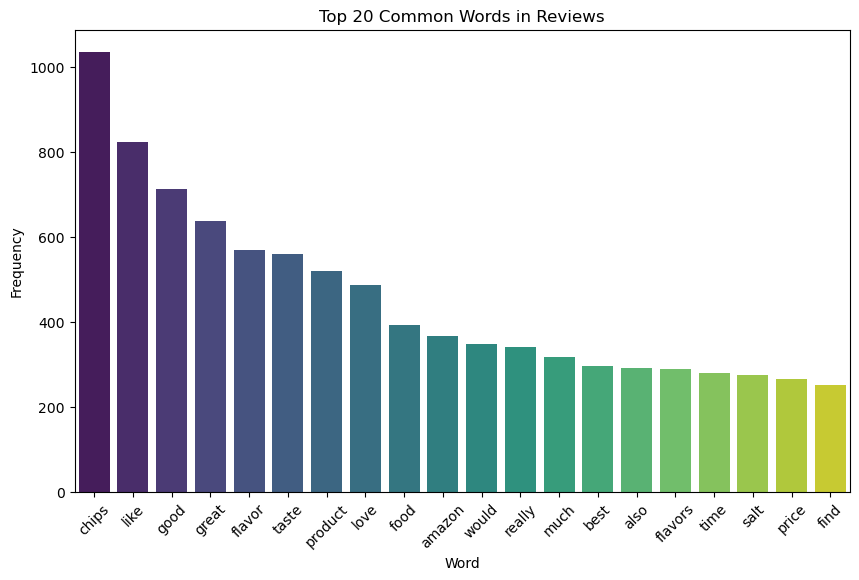

In [18]:
common_words = word_freq.most_common(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words], palette='viridis')
plt.title('Top 20 Common Words in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

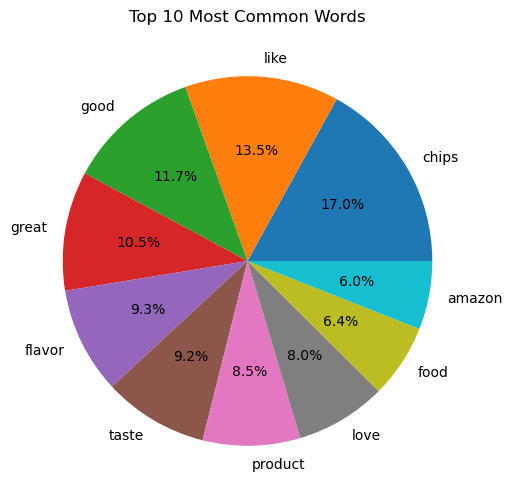

In [19]:
import matplotlib.pyplot as plt

# Assuming you already have 'common_words' which contains the most common words and their frequencies

# Get the top 10 most common words for the pie chart
top_words = dict(common_words[:10])

# Plot a pie chart for the top 10 most common words
plt.figure(figsize=(10, 6))
plt.pie(top_words.values(), labels=top_words.keys(), autopct='%1.1f%%')
plt.title('Top 10 Most Common Words')
plt.show()

In [20]:
#!pip install vaderSentiment

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", score) 
    print("sentence was rated as ", score['neg']*100, "% Negative") 
    print("sentence was rated as ", score['neu']*100, "% Neutral") 
    print("sentence was rated as ", score['pos']*100, "% Positive") 
  
    print("Sentence Overall Rated As", end = " ") 
  
    # decide sentiment as positive, negative and neutral 
    if score['compound'] >= 0.05 : 
        print("Positive") 
  
    elif score['compound'] <= - 0.05 : 
        print("Negative") 
  
    else : 
        print("Neutral")


In [22]:
#Sentiment Analysis with AFINN
#!pip install afinn
from afinn import Afinn
afn = Afinn(emoticons=True)

In [23]:
def get_sentimentscore(review):
    score = analyser.polarity_scores(review)
    vander_positive=score['pos']*100
    vander_negative=score['neg']*100
    if score['compound'] >= 0.05 : 
        vsentiment="Positive" 
  
    elif score['compound'] <= - 0.05 : 
        vsentiment="Negative" 
  
    else:  
        vsentiment="Neutral" 
       
    afn_score=afn.score(review)
    if(afn_score > 0 ):
        afn_sentiment="Positive"
    elif(afn_score < 0 ):
        afn_sentiment="Negative"
    else:
        afn_sentiment="Neutral" 
                     
        
    return pd.Series([vander_positive, vander_negative,vsentiment,afn_score,afn_sentiment])

In [24]:
review = dataset['Text'][10]
print(review)

know cactus tequila just unique combination ingredients flavour this sauce makes kind picked bottle once trip were brought back home with were totally blown away when realized that simply couldn find anywhere city were bummed because magic internet have case sauce ecstatic because love sauce mean really love sauce want sauce that tastelessly burns your throat grab bottle tequila picante gourmet inclan just realize that once taste will never want other sauce thank personal incredible service


In [25]:
dataset[['vander_positive', 'vander_negative', 'vsentiment','afn_score','afn_sentiment']]=dataset['Text'].apply(get_sentimentscore)

<Axes: >

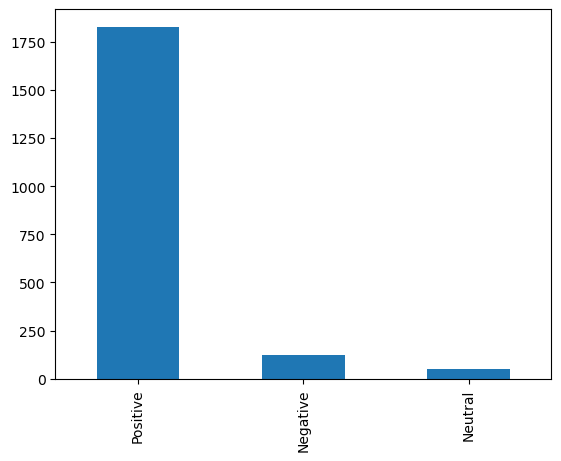

In [26]:
dataset['vsentiment'].value_counts().plot(kind='bar')

In [27]:
dataset.vsentiment.value_counts()

Positive    1828
Negative     121
Neutral       50
Name: vsentiment, dtype: int64

<Axes: >

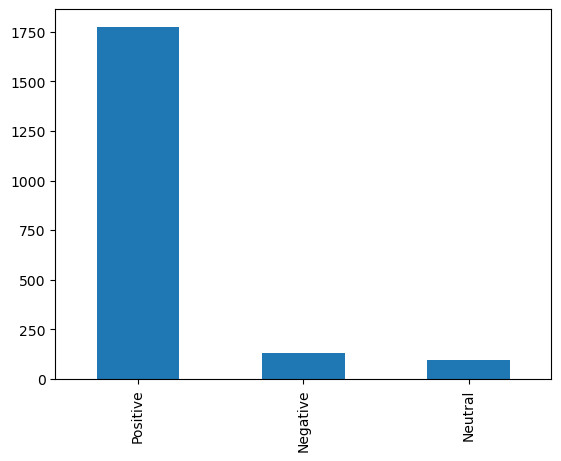

In [28]:
dataset.afn_sentiment.value_counts().plot(kind='bar')

In [29]:
dataset.afn_sentiment.value_counts()

Positive    1776
Negative     129
Neutral       94
Name: afn_sentiment, dtype: int64

In [30]:
print('Predicted Sentiment polarity:', sentiment_analyzer_scores(review))
print('Predicted Sentiment AFN polarity:', afn.score(review))

Overall sentiment dictionary is :  {'neg': 0.014, 'neu': 0.769, 'pos': 0.217, 'compound': 0.9597}
sentence was rated as  1.4000000000000001 % Negative
sentence was rated as  76.9 % Neutral
sentence was rated as  21.7 % Positive
Sentence Overall Rated As Positive
Predicted Sentiment polarity: None
Predicted Sentiment AFN polarity: 16.0


In [31]:
dataset

,sentiment,Text,Polarity,Subjectivity,Tokens,vander_positive,vander_negative,vsentiment,afn_score,afn_sentiment
0,1,have bought several vitality canned food produ...,0.450000,0.433333,"[bought, several, vitality, canned, food, prod...",41.6,0.0,Positive,16.0,Positive
1,0,product arrived labeled jumbo salted peanuts p...,0.216667,0.762963,"[product, arrived, labeled, jumbo, salted, pea...",9.8,13.3,Negative,-2.0,Negative
2,0,this confection that been around centuries lig...,0.189167,0.506667,"[confection, around, centuries, light, pillowy...",23.9,10.8,Positive,4.0,Positive
3,0,looking secret ingredient robitussin believe h...,0.166667,0.533333,"[looking, secret, ingredient, robitussin, beli...",12.1,0.0,Positive,3.0,Positive
4,1,great taffy great price there wide assortment ...,0.483333,0.637500,"[great, taffy, great, price, wide, assortment,...",54.2,0.0,Positive,9.0,Positive
...,...,...,...,...,...,...,...,...,...,...
1994,0,this delicious recipe ingredients pricy mind p...,1.000000,1.000000,"[delicious, recipe, ingredients, pricy, mind, ...",38.6,0.0,Positive,9.0,Positive
1995,1,have laugh reviews that said much work have li...,0.221875,0.397222,"[laugh, reviews, said, much, work, little, but...",40.4,0.0,Positive,15.0,Positive
1996,1,read some favorable reviews this pancake amazo...,0.265147,0.482549,"[read, favorable, reviews, pancake, amazon, qu...",29.5,2.2,Positive,36.0,Positive
1997,0,expecting great things based reviews while goo...,0.672667,0.720000,"[expecting, great, things, based, reviews, goo...",41.5,0.0,Positive,12.0,Positive


## Split data

In [32]:
from sklearn.model_selection import train_test_split

X = dataset[['vander_positive', 'vander_negative', 'vsentiment', 'afn_score', 'afn_sentiment']]
y = dataset.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=27)

In [33]:
X

,vander_positive,vander_negative,vsentiment,afn_score,afn_sentiment
0,41.6,0.0,Positive,16.0,Positive
1,9.8,13.3,Negative,-2.0,Negative
2,23.9,10.8,Positive,4.0,Positive
3,12.1,0.0,Positive,3.0,Positive
4,54.2,0.0,Positive,9.0,Positive
...,...,...,...,...,...
1994,38.6,0.0,Positive,9.0,Positive
1995,40.4,0.0,Positive,15.0,Positive
1996,29.5,2.2,Positive,36.0,Positive
1997,41.5,0.0,Positive,12.0,Positive


In [34]:
X_train

,vander_positive,vander_negative,vsentiment,afn_score,afn_sentiment
711,6.1,0.0,Positive,1.0,Positive
1055,32.8,4.6,Positive,17.0,Positive
1220,49.0,0.0,Positive,7.0,Positive
1790,36.9,0.0,Positive,11.0,Positive
558,16.0,11.8,Positive,1.0,Positive
...,...,...,...,...,...
1848,40.6,0.0,Positive,13.0,Positive
543,23.7,10.8,Positive,7.0,Positive
1864,56.3,0.0,Positive,7.0,Positive
1720,32.4,0.0,Positive,11.0,Positive


In [35]:
X_test

,vander_positive,vander_negative,vsentiment,afn_score,afn_sentiment
1805,35.2,0.0,Positive,7.0,Positive
1205,26.1,0.0,Positive,6.0,Positive
353,8.8,8.6,Neutral,0.0,Neutral
535,13.5,4.5,Positive,7.0,Positive
578,50.4,13.8,Positive,7.0,Positive
...,...,...,...,...,...
443,11.5,4.6,Positive,3.0,Positive
1909,30.2,26.8,Positive,-3.0,Negative
1287,33.3,3.1,Positive,12.0,Positive
342,15.8,0.0,Positive,2.0,Positive


In [36]:
y

0       1
1       0
2       0
3       0
4       1
       ..
1994    0
1995    1
1996    1
1997    0
1998    0
Name: sentiment, Length: 1999, dtype: int64

In [37]:
y_train

711     1
1055    1
1220    1
1790    1
558     0
       ..
1848    1
543     0
1864    1
1720    1
1043    1
Name: sentiment, Length: 1799, dtype: int64

In [38]:
y_test

1805    1
1205    1
353     1
535     0
578     1
       ..
443     1
1909    1
1287    1
342     0
590     1
Name: sentiment, Length: 200, dtype: int64

## Train an ML model for Text Classification
Now that the dataset is ready, it is time to train a Machine Learning model on the same. You will be using a Naive Bayes classifier from sklearn which is a prominent python library used for machine learning.

## Choosing a Model and Training

In [39]:
#!pip install scikit-learn

In [40]:
#Logistic Regression report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['Text'], dataset['sentiment'], test_size=0.1, random_state=42)

# Create TF-IDF vectors for the text data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:',accuracy)

report = classification_report(y_test, y_pred)
print(report)


Logistic Regression Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.80      0.37      0.51        75
           1       0.72      0.94      0.81       125

    accuracy                           0.73       200
   macro avg       0.76      0.66      0.66       200
weighted avg       0.75      0.73      0.70       200



In [41]:
#Naive Bayes

from sklearn.naive_bayes import MultinomialNB

# Split the dataset into training and testing sets
X = dataset['Text']
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the TF-IDF transformed training data
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Naive Bayes Accuracy:',accuracy)
print(report)


Naive Bayes Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.92      0.24      0.38       149
           1       0.69      0.99      0.81       251

    accuracy                           0.71       400
   macro avg       0.81      0.61      0.60       400
weighted avg       0.77      0.71      0.65       400



In [42]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
print('Random Forest Accuracy:',accuracy_rf)
print(report_rf)


Random Forest Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.77      0.32      0.45       149
           1       0.70      0.94      0.80       251

    accuracy                           0.71       400
   macro avg       0.73      0.63      0.63       400
weighted avg       0.73      0.71      0.67       400



In [43]:
dataset.to_csv('Amazon_senti.csv')

## Conclusion
In this sentiment analysis project, we explored multiple models for classifying text data into sentiment categories and ultimately selected the Random Forest model, which exhibited competitive accuracy and superior F1-scores for both sentiment classes. We emphasized comprehensive metrics, including precision, recall, and F1-score, to evaluate model performance effectively. Data preprocessing, including text cleaning and TF-IDF feature extraction, played a crucial role in preparing the text data for machine learning.